Tables from: https://archive.ics.uci.edu/dataset/186/wine+quality  (09/07/2023) \
winequality-red.csv, observations: 1.599  \
winequality-white.csv, observations: 4.898 

Columns:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol
- quality

"quality" will be dropped because it is not based on physicochemical tests. It is based on sensory data.

There are 1177 duplicated observations. After removing duplicated values, we have:
- white: 3961
- red: 1359

In [1]:
# ! pip install -U scikit-learn

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

import tensorflow as tf
import keras
from keras import models
from keras import layers

In [3]:
df_red = pd.read_csv('winequality-red.csv', sep = ";")
df_white = pd.read_csv('winequality-white.csv', sep = ";")

# Add wine type
df_red['type'] = 'red'
df_white['type'] = 'white'

# Join tables
df = pd.concat([df_red, df_white])
# Drop quality
df.drop('quality', axis = 1, inplace = True)
# Shuffle data
df = df.sample(frac = 1).reset_index(drop = True)

display(df)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.3             0.260         0.33            11.8      0.057   
1               8.1             0.170         0.21             1.6      0.036   
2               9.5             0.885         0.27             2.3      0.084   
3               8.9             0.290         0.35             1.9      0.067   
4               6.5             0.350         0.38             7.4      0.036   
...             ...               ...          ...             ...        ...   
6492            8.8             0.410         0.64             2.2      0.093   
6493            6.2             0.235         0.34             1.9      0.036   
6494            7.3             0.350         0.24             2.0      0.067   
6495            7.4             0.240         0.29            10.1      0.050   
6496            7.1             0.200         0.35             3.2      0.034   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    48.0                 127.0  0.99693  3.10       0.55   
1                    24.0                 119.0  0.99396  3.18       0.52   
2                    31.0                 145.0  0.99780  3.24       0.53   
3                    25.0                  57.0  0.99700  3.18       1.36   
4                    20.0                 196.0  0.99712  3.47       0.48   
...                   ...                   ...      ...   ...        ...   
6492                  9.0                  42.0  0.99860  3.54       0.66   
6493                  4.0                 117.0  0.99032  3.40       0.44   
6494                 28.0                  48.0  0.99576  3.43       0.54   
6495                 21.0                 105.0  0.99620  3.13       0.35   
6496                 21.0                 107.0  0.99195  3.11       0.54   

      alcohol   type  
0        10.0  white  
1        10.1  white  
2         9.4    red  
3        10.3    red  
4         9.1  white  
...       ...    ...  
6492     10.5    red  
6493     12.2  white  
6494     10.0    red  
6495      9.5  white  
6496     11.1  white  

[6497 rows x 12 columns]

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type'],
      dtype='object')

## Verify Missing

In [5]:
# Verify missing values
df_missing = pd.DataFrame(df.isna().sum())
df_missing.columns = ['quantity']
df_missing['percent'] = (df_missing.quantity / len(df)) * 100
df_missing

quantity  percent
fixed acidity                0      0.0
volatile acidity             0      0.0
citric acid                  0      0.0
residual sugar               0      0.0
chlorides                    0      0.0
free sulfur dioxide          0      0.0
total sulfur dioxide         0      0.0
density                      0      0.0
pH                           0      0.0
sulphates                    0      0.0
alcohol                      0      0.0
type                         0      0.0

## Verify duplicates

In [6]:
df.duplicated().sum()

1177

In [7]:
df[df.duplicated()]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
127             7.4              0.19         0.30            12.8      0.053   
147             7.8              0.60         0.26             2.0      0.080   
264             7.1              0.28         0.26             1.9      0.049   
315             6.0              0.23         0.34             1.3      0.025   
331             8.8              0.61         0.14             2.4      0.067   
...             ...               ...          ...             ...        ...   
6481            7.7              0.25         0.30             7.8      0.038   
6482            7.4              0.25         0.36            13.2      0.067   
6486            6.5              0.28         0.34             3.6      0.040   
6492            8.8              0.41         0.64             2.2      0.093   
6495            7.4              0.24         0.29            10.1      0.050   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
127                  48.5                 229.0  0.99860  3.14       0.49   
147                  31.0                 131.0  0.99622  3.21       0.52   
264                  12.0                  86.0  0.99340  3.15       0.38   
315                  23.0                 111.0  0.98961  3.36       0.37   
331                  10.0                  42.0  0.99690  3.19       0.59   
...                   ...                   ...      ...   ...        ...   
6481                 67.0                 196.0  0.99555  3.10       0.50   
6482                 53.0                 178.0  0.99760  3.01       0.48   
6486                 29.0                 121.0  0.99111  3.28       0.48   
6492                  9.0                  42.0  0.99860  3.54       0.66   
6495                 21.0                 105.0  0.99620  3.13       0.35   

      alcohol   type  
127       9.1  white  
147       9.9    red  
264       9.4  white  
315      12.7  white  
331       9.5    red  
...       ...    ...  
6481     10.1  white  
6482      9.0  white  
6486     12.1  white  
6492     10.5    red  
6495      9.5  white  

[1177 rows x 12 columns]

In [8]:
# Remove duplicates
df = df[~df.duplicated()]
df.type.value_counts()

type
white    3961
red      1359
Name: count, dtype: int64

## Verify data type

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  type                  5320 non-null   object 
dtypes: float64(11), object(1)
memory usage: 540.3+ KB


In [10]:
# Define type as category
df.loc[:,'type'] = df['type'].astype('category')

In [11]:
# Make data frame with basic imformation about the columns
df_columns_names = pd.DataFrame(df.columns, columns = ['name'])
df_columns_names['description'] = df_columns_names['name']
df_columns_names['type'] = df.dtypes.values
df_columns_names

name           description     type
0          fixed acidity         fixed acidity  float64
1       volatile acidity      volatile acidity  float64
2            citric acid           citric acid  float64
3         residual sugar        residual sugar  float64
4              chlorides             chlorides  float64
5    free sulfur dioxide   free sulfur dioxide  float64
6   total sulfur dioxide  total sulfur dioxide  float64
7                density               density  float64
8                     pH                    pH  float64
9              sulphates             sulphates  float64
10               alcohol               alcohol  float64
11                  type                  type   object

## Describe

In [12]:
df.describe(include = 'all').T

count unique    top  freq        mean        std  \
fixed acidity         5320.0    NaN    NaN   NaN    7.215179   1.319671   
volatile acidity      5320.0    NaN    NaN   NaN     0.34413   0.168248   
citric acid           5320.0    NaN    NaN   NaN    0.318494   0.147157   
residual sugar        5320.0    NaN    NaN   NaN    5.048477    4.50018   
chlorides             5320.0    NaN    NaN   NaN     0.05669   0.036863   
free sulfur dioxide   5320.0    NaN    NaN   NaN   30.036654  17.805045   
total sulfur dioxide  5320.0    NaN    NaN   NaN  114.109023  56.774223   
density               5320.0    NaN    NaN   NaN    0.994535   0.002966   
pH                    5320.0    NaN    NaN   NaN    3.224664   0.160379   
sulphates             5320.0    NaN    NaN   NaN    0.533357   0.149743   
alcohol               5320.0    NaN    NaN   NaN   10.549241   1.185933   
type                    5320      2  white  3961         NaN        NaN   

                          min     25%      50%      75%      max  
fixed acidity             3.8     6.4      7.0      7.7     15.9  
volatile acidity         0.08    0.23      0.3     0.41     1.58  
citric acid               0.0    0.24     0.31      0.4     1.66  
residual sugar            0.6     1.8      2.7      7.5     65.8  
chlorides               0.009   0.038    0.047    0.066    0.611  
free sulfur dioxide       1.0    16.0     28.0     41.0    289.0  
total sulfur dioxide      6.0    74.0    116.0   153.25    440.0  
density               0.98711  0.9922  0.99465  0.99677  1.03898  
pH                       2.72    3.11     3.21     3.33     4.01  
sulphates                0.22    0.43     0.51      0.6      2.0  
alcohol                   8.0     9.5     10.4     11.4     14.9  
type                      NaN     NaN      NaN      NaN      NaN

## Data Analysis

In [13]:
def bar_graph_categoric_var(df_variable, title, rotation = 0, limite_categorias = 50, alphabetic_order = False):
    plt.rcParams.update(plt.rcParamsDefault)
    color = 'cornflowerblue'
    contorno = None
    if alphabetic_order == True:
        df_bar_graph = pd.DataFrame(df_variable.value_counts()).sort_index().head(limite_categorias)
    else:
        df_bar_graph = pd.DataFrame(df_variable.value_counts()).head(limite_categorias)
    ax = df_bar_graph.plot(kind = 'bar', width = 0.5, rot = rotation
                          , align = 'center', color = color, edgecolor = contorno)
    ax.get_legend().remove()
    total = 0
    for bars in ax.patches:
        total += bars.get_height()
       
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height/total:.1%}'
                    , (x + width/2, y + 2 + height)
                    , ha = 'center')
        plt.title(title, fontsize = 10)

### Target variable

type         %
type                 
white  3961  0.744549
red    1359  0.255451

<Figure size 600x300 with 0 Axes>

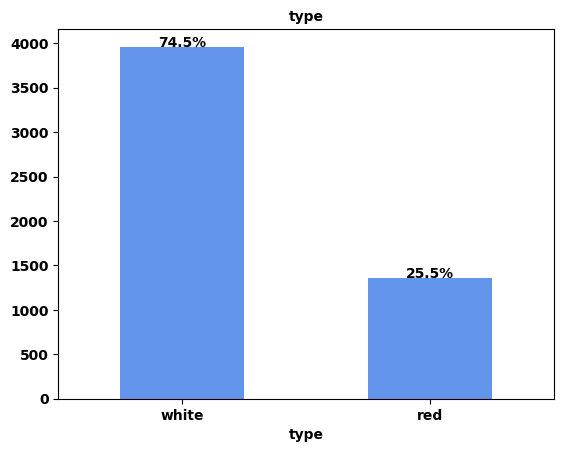

In [14]:
# Proporção da target
variable = 'type'
title = 'type'
value_counts = pd.DataFrame(df[variable].value_counts(dropna = False))
value_counts.columns = [variable]
value_counts['%'] = value_counts[variable] / sum(value_counts[variable])
display(value_counts)
plt.figure(figsize = (6,3))
df_variable = df[variable]
bar_graph_categoric_var(df_variable, title, rotation = 0, limite_categorias = 15)
plt.show()
plt.close()

### Continuous variables

In [15]:
def bar_graf(x_limits, top_size_y, df_variable, title, bins = 10):
    plt.rcParams.update(plt.rcParamsDefault)
    color = 'cornflowerblue'
    contorno = None
   
    ax = df_variable.hist(density = False
            , weights = np.ones(len(df_variable)) / len(df_variable)
            , histtype = 'bar', bins = bins, align = 'mid'
            , orientation = 'vertical'
            , color = color, edgecolor = contorno)
   
    plt.grid(False)
    plt.title(title, fontsize = 10)
    plt.xlim(x_limits)
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.ylim(top = top_size_y)
    return

def box_plot_graph(df, variable, title, y_lim):
    plt.rcParams.update(plt.rcParamsDefault)
   
    bg_color = "white"
    contorno = 'black'
    color = 'black'
    sns.set_style("darkgrid", {'axes.facecolor': bg_color
                              , 'axes.edgecolor': contorno})
    meanpointprops = dict(color = color, linewidth = 1.5)
   
    ax = sns.boxplot(y = variable, data = df
                    , showmeans = True, meanline = True, meanprops = meanpointprops)
    ax.set_title(title, fontsize = 10)
    ax.set(ylim = y_lim)

def box_plot_graph_hue(df, variable, title, y_lim, hue_var = 'target', hue_order = ['white', 'red']):
    plt.rcParams.update(plt.rcParamsDefault)
   
    bg_color = "white"
    contorno = 'black'
    color = 'black'
    sns.set_style("darkgrid", {'axes.facecolor': bg_color
                              , 'axes.edgecolor': contorno})
    meanpointprops = dict(color = color, linewidth = 1.5)
   
    ax = sns.boxplot(y = variable, data = df, x = hue_var, order = hue_order
                    , showmeans = True, meanline = True, meanprops = meanpointprops)
    ax.set_title(title, fontsize = 10)
    ax.set(ylim = y_lim)
    
def plots_continuous_variables(df, variable, target_variable, bins, title, x_max, top_size_y):
    plt.figure(figsize = (6,3))

    x_limits = [-1, x_max]
    df_variable = df[variable]

    bar_graf(x_limits, top_size_y, df_variable, title, bins)
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()
    plt.close()

    # Boxplot
    plt.figure(figsize = (2,3))
    title = 'Boxplot: ' + title
    y_lim = (-1, x_max)
    box_plot_graph(df, variable, title, y_lim)
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()
    plt.close()

    media = df[variable].mean()
    mediana = df[variable].median()
    print(variable, 'mean:', media)
    print(variable, 'median:', mediana)


    # Verifica relação com a target
    plt.figure(figsize = (5,3))
    title = title
    y_lim = (0, x_max)
    box_plot_graph_hue(df, variable, title, y_lim, hue_var = target_variable)
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()
    plt.close()

    mean_white = df[np.in1d(df[target_variable], 'white')][variable].mean()
    median_white = df[np.in1d(df[target_variable], 'white')][variable].median()
    mean_red = df[np.in1d(df[target_variable], 'red')][variable].mean()
    median_red = df[np.in1d(df[target_variable], 'red')][variable].median()
    zeros_or_negatives = len(df[df[variable] <= 0])
    print(variable, 'Mean for type white:', mean_white)
    print(variable, 'Median for type white:', median_white)
    print(variable, 'Mean for type red:', mean_red)
    print(variable, 'Median for type red:', median_red)
    print(variable, 'Quantity of 0 or negatves:', zeros_or_negatives, 'percent:', f'{zeros_or_negatives/len(df):.1%}')

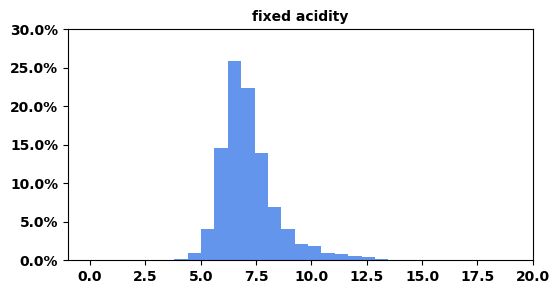

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


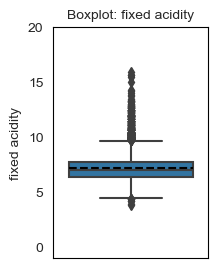

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


fixed acidity mean: 7.215178571428571
fixed acidity median: 7.0


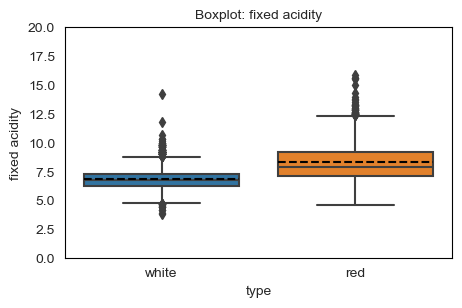

fixed acidity Mean for type white: 6.8393461247159815
fixed acidity Median for type white: 6.8
fixed acidity Mean for type red: 8.310596026490066
fixed acidity Median for type red: 7.9
fixed acidity Quantity of 0 or negatves: 0 percent: 0.0%


In [16]:
# Variável: fixed acidity 
variable = 'fixed acidity'
title = 'fixed acidity'
target_variable = 'type'
x_max = 20
top_size_y = 0.3
bins = 20

plots_continuous_variables(df, variable, target_variable, bins, title, x_max, top_size_y)

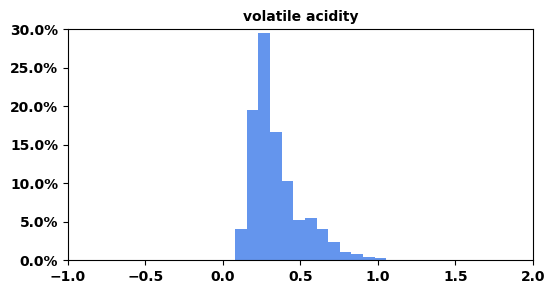

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


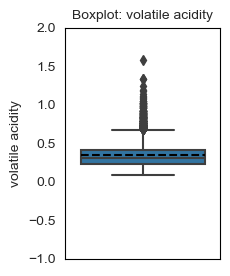

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


volatile acidity mean: 0.3441296992481203
volatile acidity median: 0.3


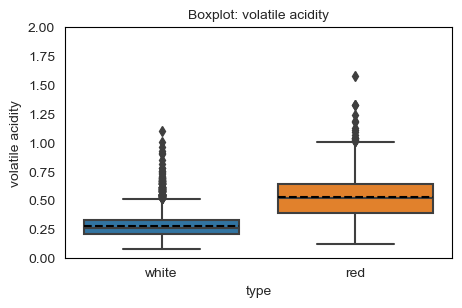

volatile acidity Mean for type white: 0.2805377429941934
volatile acidity Median for type white: 0.26
volatile acidity Mean for type red: 0.5294775570272259
volatile acidity Median for type red: 0.52
volatile acidity Quantity of 0 or negatves: 0 percent: 0.0%


In [17]:
# Variável: volatile acidity
variable = 'volatile acidity'
title = 'volatile acidity'
target_variable = 'type'
x_max = 2
top_size_y = 0.3
bins = 20

plots_continuous_variables(df, variable, target_variable, bins, title, x_max, top_size_y)

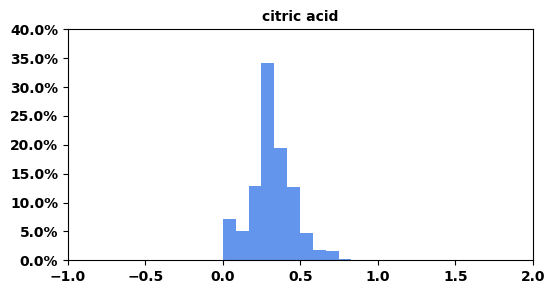

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


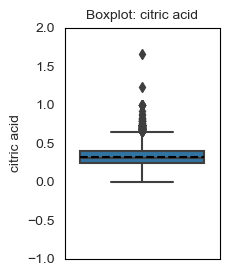

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


citric acid mean: 0.31849436090225564
citric acid median: 0.31


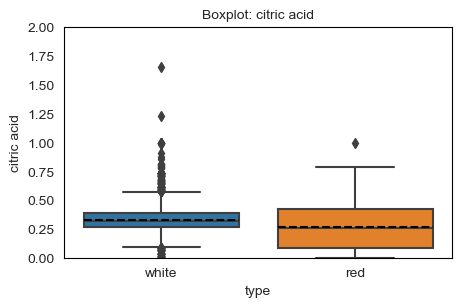

citric acid Mean for type white: 0.3343322393335017
citric acid Median for type white: 0.32
citric acid Mean for type red: 0.2723325974981604
citric acid Median for type red: 0.26
citric acid Quantity of 0 or negatves: 136 percent: 2.6%


In [18]:
# Variável: citric acid
variable = 'citric acid'
title = 'citric acid'
target_variable = 'type'
x_max = 2
top_size_y = 0.4
bins = 20

plots_continuous_variables(df, variable, target_variable, bins, title, x_max, top_size_y)

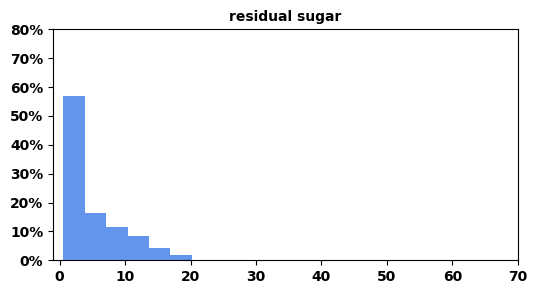

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


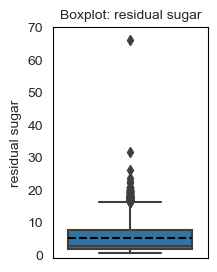

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


residual sugar mean: 5.0484774436090225
residual sugar median: 2.7


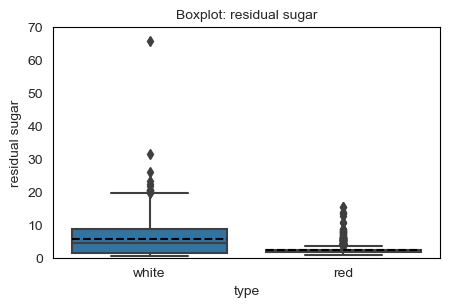

residual sugar Mean for type white: 5.91481949002777
residual sugar Median for type white: 4.7
residual sugar Mean for type red: 2.5233995584988964
residual sugar Median for type red: 2.2
residual sugar Quantity of 0 or negatves: 0 percent: 0.0%


In [19]:
# Variável: residual sugar
variable = 'residual sugar'
title = 'residual sugar'
target_variable = 'type'
x_max = 70
top_size_y = 0.8
bins = 20

plots_continuous_variables(df, variable, target_variable, bins, title, x_max, top_size_y)

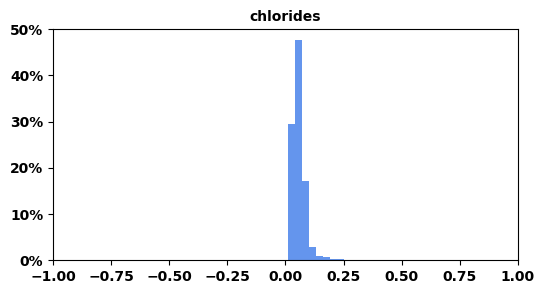

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


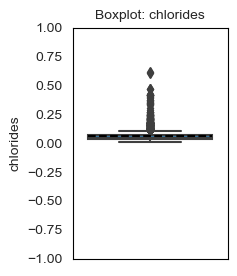

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


chlorides mean: 0.05668984962406016
chlorides median: 0.047


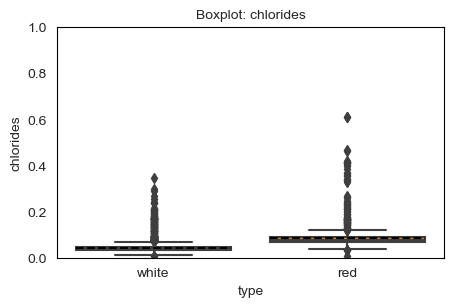

chlorides Mean for type white: 0.0459050744761424
chlorides Median for type white: 0.042
chlorides Mean for type red: 0.08812362030905077
chlorides Median for type red: 0.079
chlorides Quantity of 0 or negatves: 0 percent: 0.0%


In [20]:
# Variável: chlorides
variable = 'chlorides'
title = 'chlorides'
target_variable = 'type'
x_max = 1
top_size_y = 0.5
bins = 20

plots_continuous_variables(df, variable, target_variable, bins, title, x_max, top_size_y)

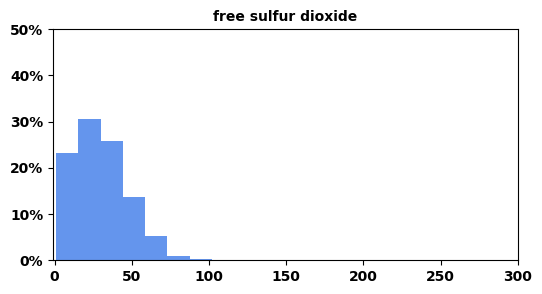

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


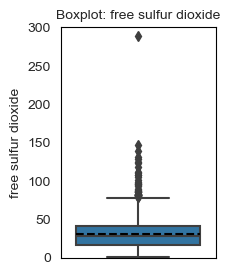

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


free sulfur dioxide mean: 30.036654135338345
free sulfur dioxide median: 28.0


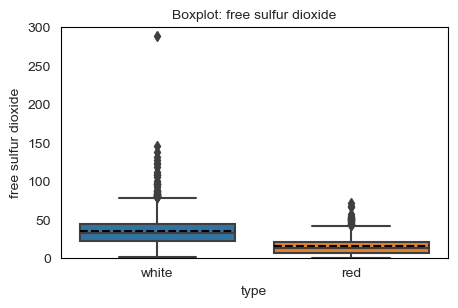

free sulfur dioxide Mean for type white: 34.889169401666244
free sulfur dioxide Median for type white: 33.0
free sulfur dioxide Mean for type red: 15.893303899926417
free sulfur dioxide Median for type red: 14.0
free sulfur dioxide Quantity of 0 or negatves: 0 percent: 0.0%


In [21]:
# Variável: free sulfur dioxide
variable = 'free sulfur dioxide'
title = 'free sulfur dioxide'
target_variable = 'type'
x_max = 300
top_size_y = 0.5
bins = 20

plots_continuous_variables(df, variable, target_variable, bins, title, x_max, top_size_y)

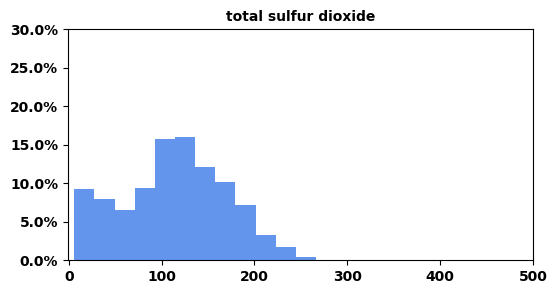

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


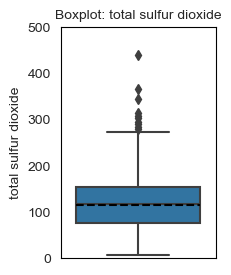

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


total sulfur dioxide mean: 114.10902255639098
total sulfur dioxide median: 116.0


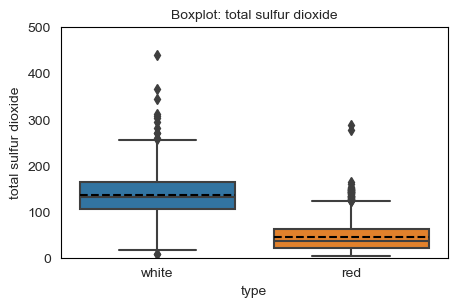

total sulfur dioxide Mean for type white: 137.19351173945972
total sulfur dioxide Median for type white: 133.0
total sulfur dioxide Mean for type red: 46.82597498160412
total sulfur dioxide Median for type red: 38.0
total sulfur dioxide Quantity of 0 or negatves: 0 percent: 0.0%


In [22]:
# Variável: total sulfur dioxide
variable = 'total sulfur dioxide'
title = variable
target_variable = 'type'
x_max = 500
top_size_y = 0.3
bins = 20

plots_continuous_variables(df, variable, target_variable, bins, title, x_max, top_size_y)

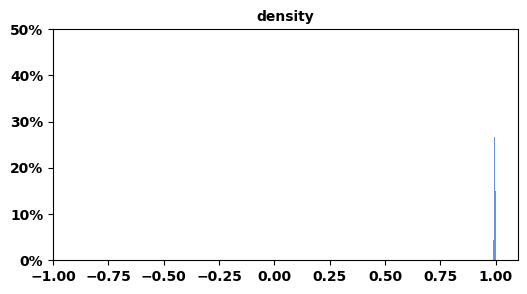

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


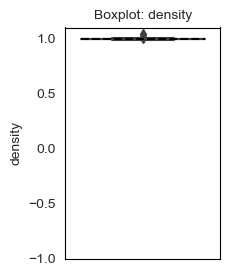

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


density mean: 0.9945352988721804
density median: 0.99465


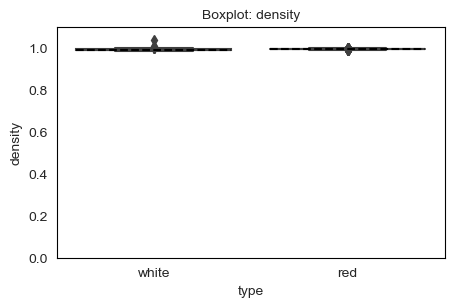

density Mean for type white: 0.9937895304216107
density Median for type white: 0.9935
density Mean for type red: 0.9967089477557027
density Median for type red: 0.9967
density Quantity of 0 or negatves: 0 percent: 0.0%


In [23]:
# Variável: density
variable = 'density'
title = variable
target_variable = 'type'
x_max = 1.1
top_size_y = 0.5
bins = 20

plots_continuous_variables(df, variable, target_variable, bins, title, x_max, top_size_y)

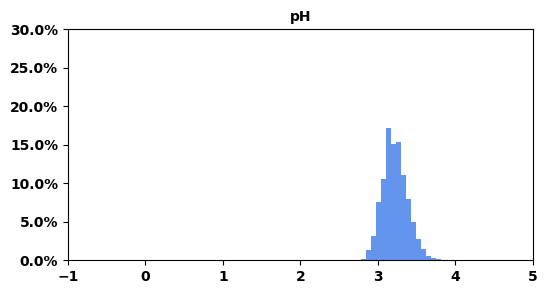

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


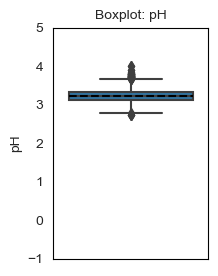

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


pH mean: 3.2246635338345864
pH median: 3.21


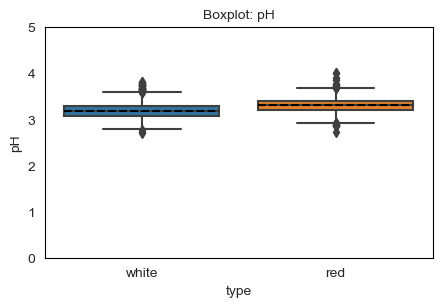

pH Mean for type white: 3.1954582176218125
pH Median for type white: 3.18
pH Mean for type red: 3.309786607799853
pH Median for type red: 3.31
pH Quantity of 0 or negatves: 0 percent: 0.0%


In [24]:
# Variável: pH	
variable = 'pH'
title = variable
target_variable = 'type'
x_max = 5
top_size_y = 0.3
bins = 20

plots_continuous_variables(df, variable, target_variable, bins, title, x_max, top_size_y)

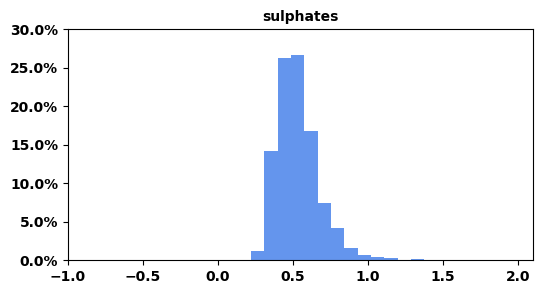

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


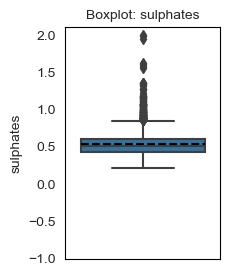

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


sulphates mean: 0.5333571428571429
sulphates median: 0.51


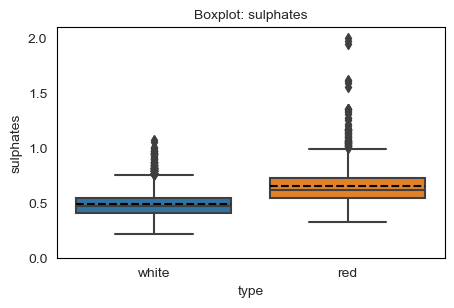

sulphates Mean for type white: 0.4903509214844737
sulphates Median for type white: 0.48
sulphates Mean for type red: 0.6587049300956586
sulphates Median for type red: 0.62
sulphates Quantity of 0 or negatves: 0 percent: 0.0%


In [25]:
# Variável: sulphates	
variable = 'sulphates'
title = variable
target_variable = 'type'
x_max = 2.1
top_size_y = 0.3
bins = 20

plots_continuous_variables(df, variable, target_variable, bins, title, x_max, top_size_y)

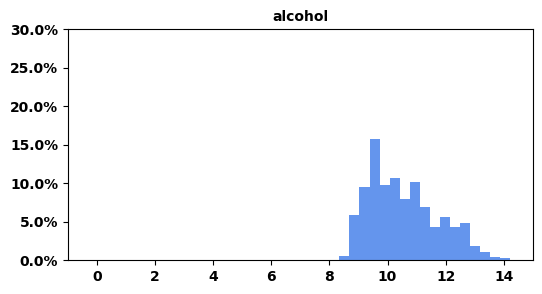

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


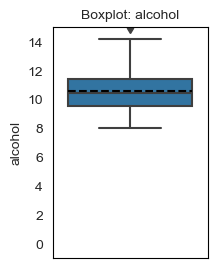

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


alcohol mean: 10.549241228070175
alcohol median: 10.4


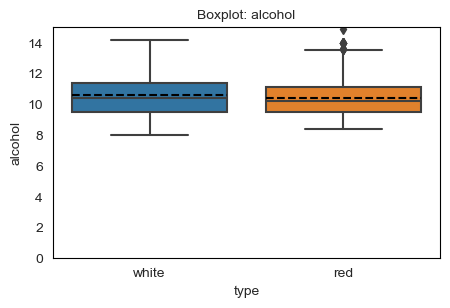

alcohol Mean for type white: 10.58935790625263
alcohol Median for type white: 10.4
alcohol Mean for type red: 10.432315428010792
alcohol Median for type red: 10.2
alcohol Quantity of 0 or negatves: 0 percent: 0.0%


In [26]:
# Variável: alcohol	
variable = 'alcohol'
title = variable
target_variable = 'type'
x_max = 15
top_size_y = 0.3
bins = 20

plots_continuous_variables(df, variable, target_variable, bins, title, x_max, top_size_y)

In [27]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5320.000000       5320.000000  5320.000000     5320.000000   
mean        7.215179          0.344130     0.318494        5.048477   
std         1.319671          0.168248     0.147157        4.500180   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.800000   
50%         7.000000          0.300000     0.310000        2.700000   
75%         7.700000          0.410000     0.400000        7.500000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5320.000000          5320.000000           5320.000000  5320.000000   
mean      0.056690            30.036654            114.109023     0.994535   
std       0.036863            17.805045             56.774223     0.002966   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            16.000000             74.000000     0.992200   
50%       0.047000            28.000000            116.000000     0.994650   
75%       0.066000            41.000000            153.250000     0.996770   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol  
count  5320.000000  5320.000000  5320.000000  
mean      3.224664     0.533357    10.549241  
std       0.160379     0.149743     1.185933  
min       2.720000     0.220000     8.000000  
25%       3.110000     0.430000     9.500000  
50%       3.210000     0.510000    10.400000  
75%       3.330000     0.600000    11.400000  
max       4.010000     2.000000    14.900000

## Correlation

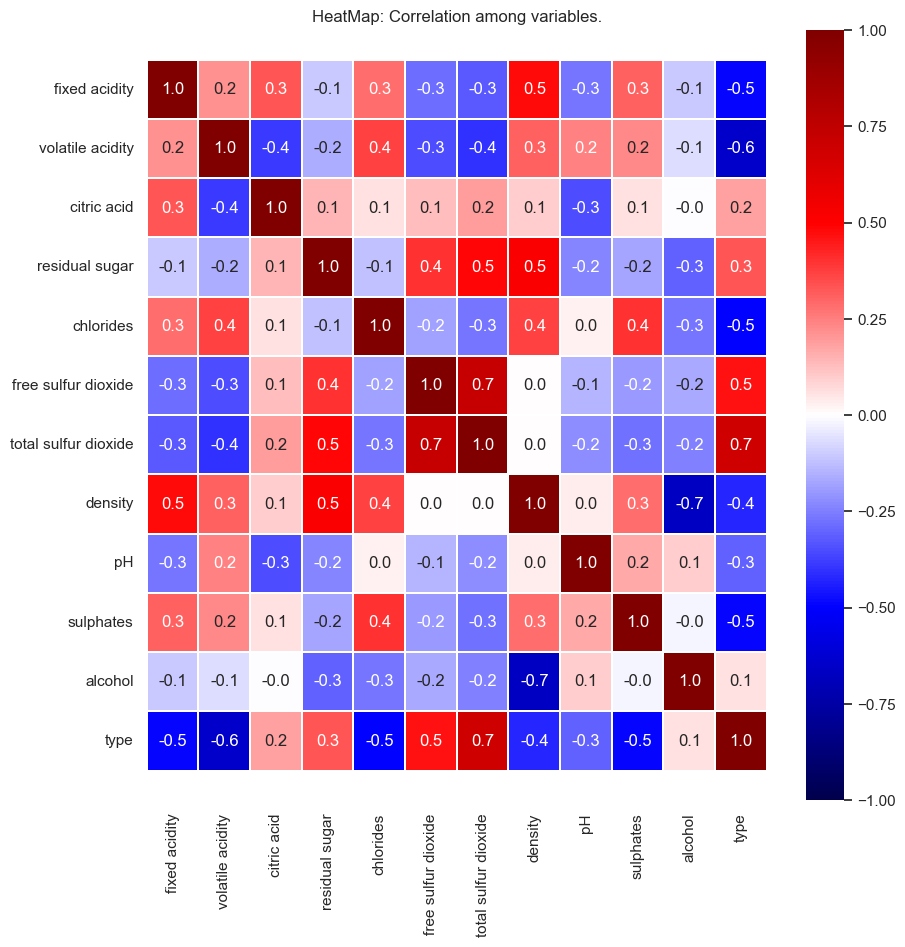

In [28]:
def correlation_heatmap(df, title):
    size_x = 10
    size_y = 10
    plt.figure(figsize = (size_x, size_y))
    sns.set(font_scale = 1)
    corr_matrix = df.corr()
    with sns.axes_style('white'):
        ax = sns.heatmap(corr_matrix
                        , linewidth = 0.2
                        , annot = True, fmt = '.1f'
                        , cmap = 'seismic'
                        , vmin = -1, vmax = 1)
    plt.title(title)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()
    plt.close()
    
    
# drop_variables_2 = []
# df_corr = df.drop(drop_variaveis_2, axis = 1).copy()
df_corr = df.copy()
df_corr['type'] = [1 if x == 'white' else 0 for x in df_corr['type']]

title = 'HeatMap: Correlation among variables.'
correlation_heatmap(df_corr, title)

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

<Figure size 1000x1000 with 0 Axes>

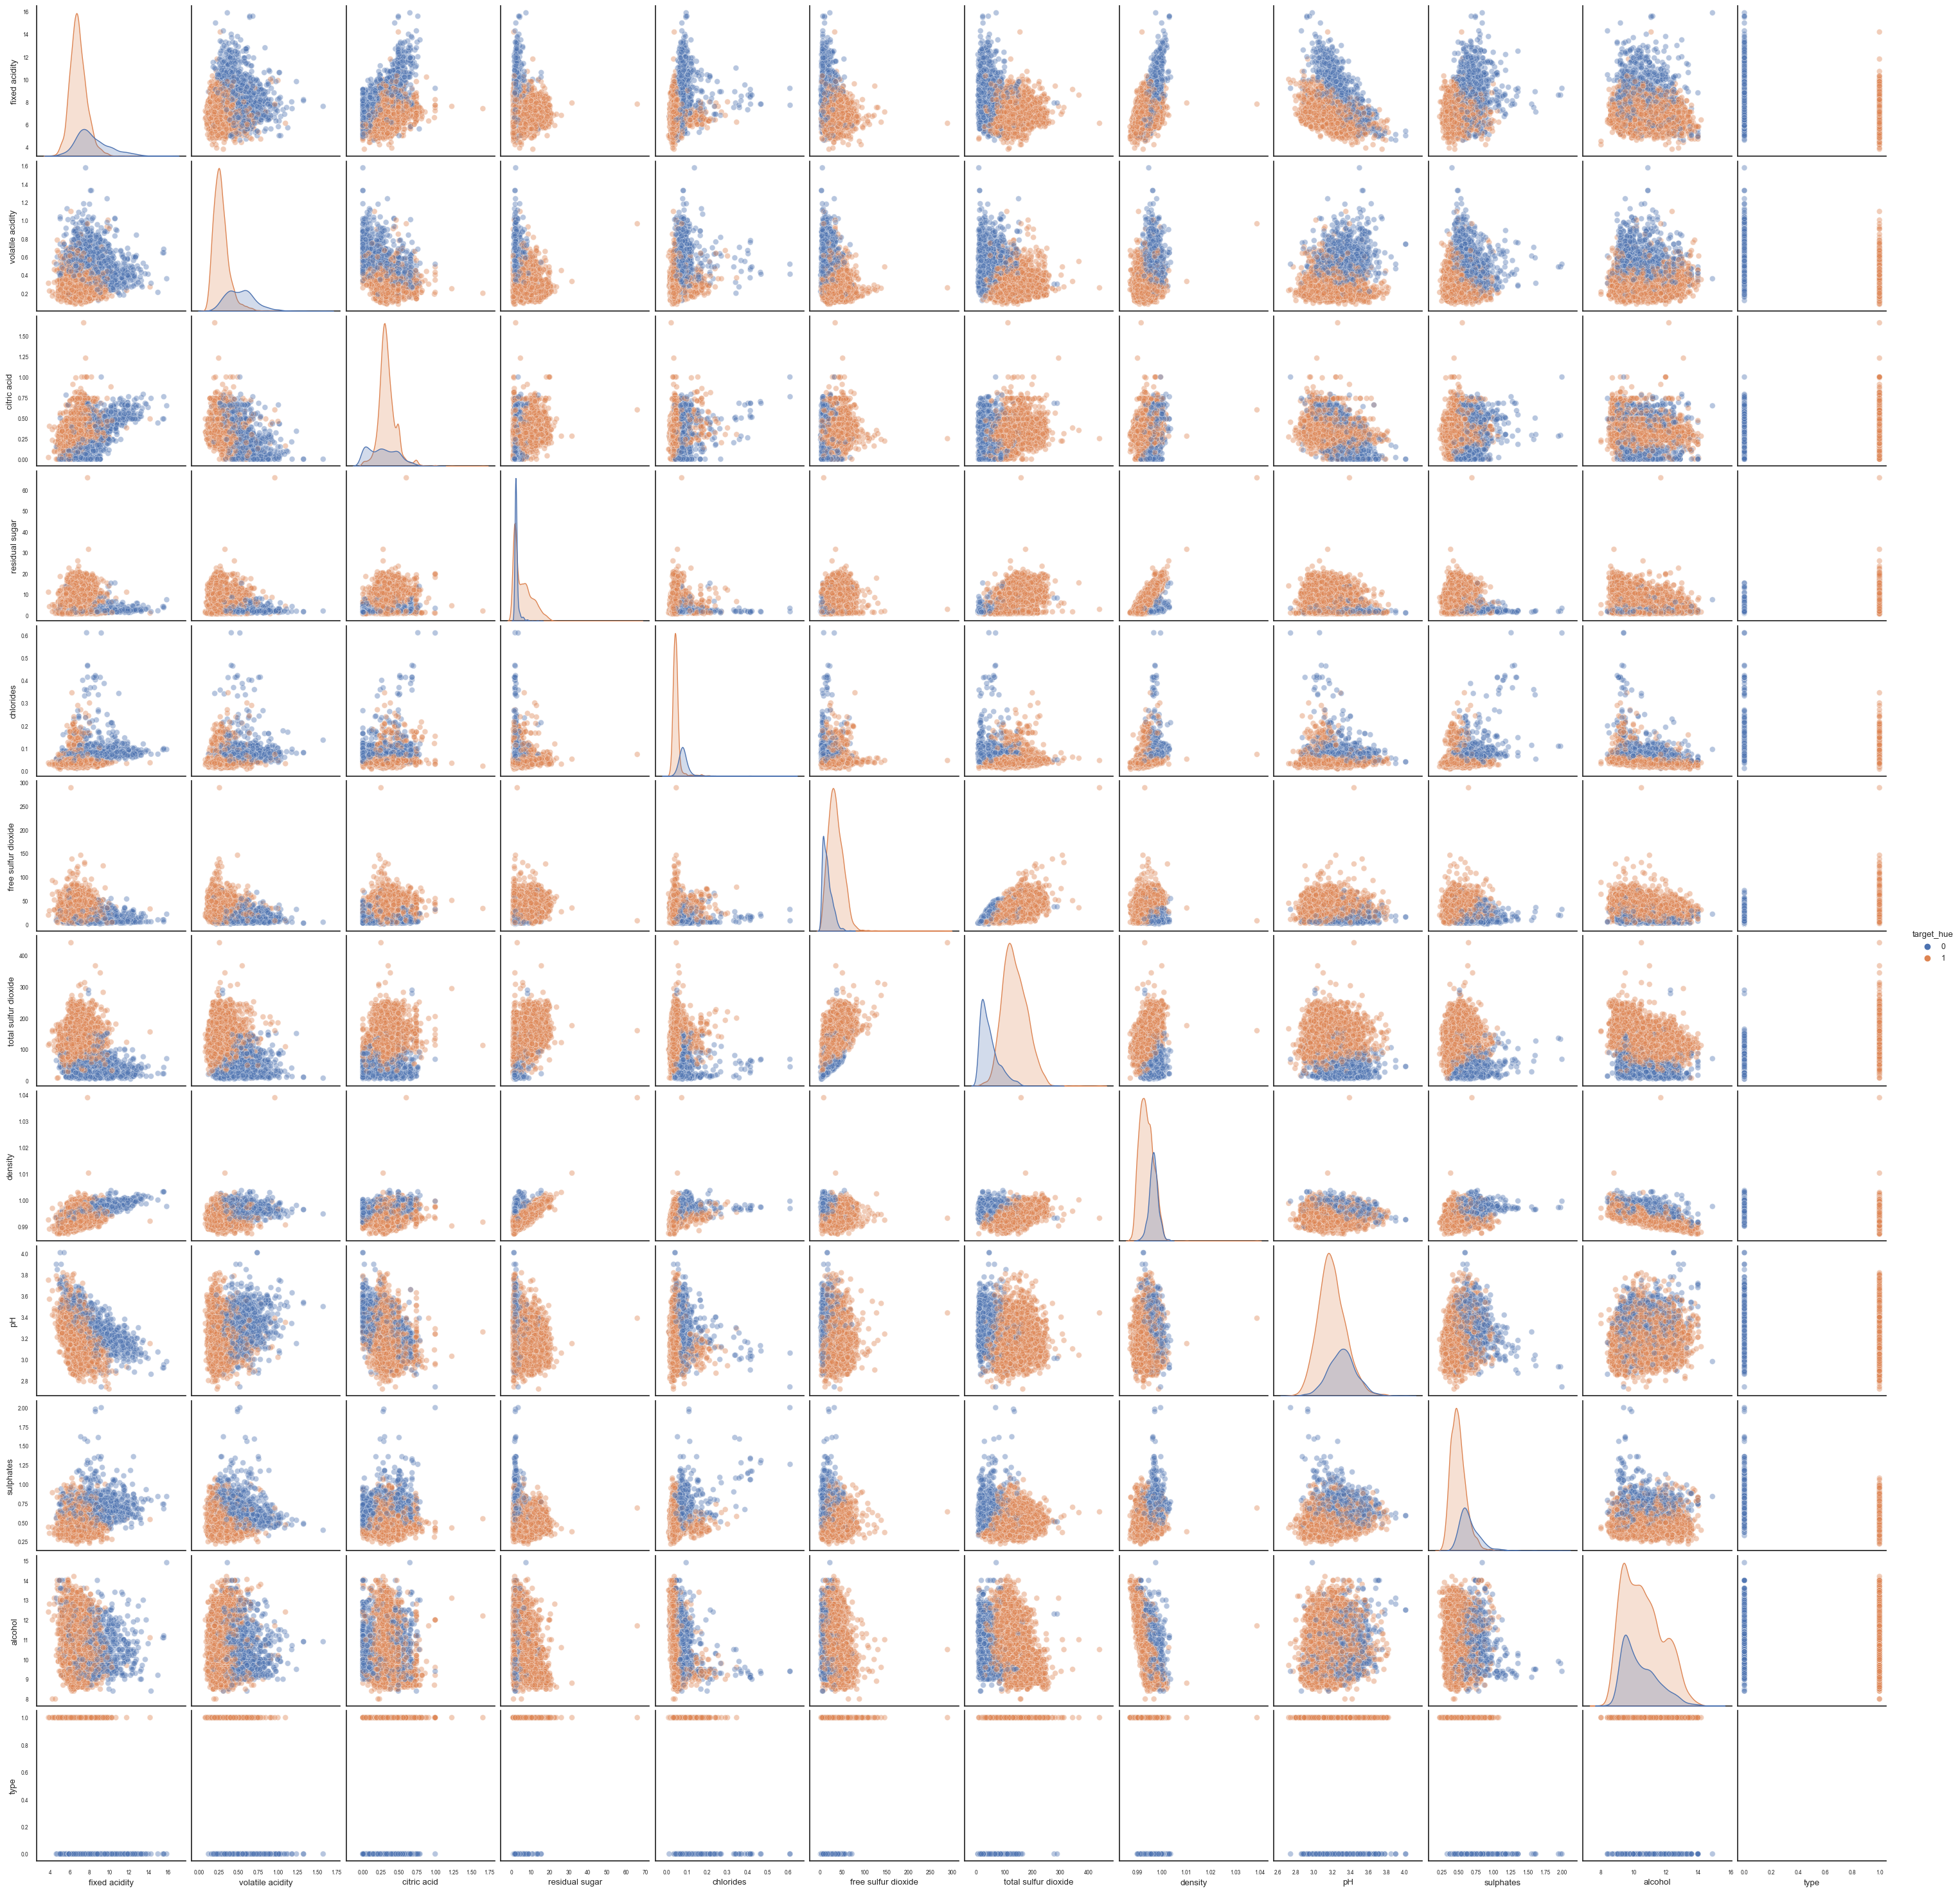

In [29]:
# Pair plot
# drop_variaveis_3 = []
# df_pairplot = df_corr.drop(drop_variaveis_3, axis = 1).copy()
df_pairplot = df_corr.copy()
df_pairplot['target_hue'] = df_pairplot['type']

# Jupyter cannot plot too many variables.
# df_pairplot_aux = df_pairplot[[, 'type', 'target_hue']]
df_pairplot_aux = df_pairplot.copy()

plt.figure(figsize = (10, 10))
sns.set(font_scale = 0.8)
plt.rc('xtick', labelsize = 6)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 6)    # fontsize of the tick labels
with sns.axes_style('white'):
    ax = sns.pairplot(df_pairplot_aux, hue = "target_hue", hue_order = [0, 1]
                      , plot_kws = {'alpha': 0.4, 's': 40})
plt.show()
plt.close()